# Filtering Well Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point
from arcgis.gis import GIS

## Loading relevant shapefiles

In [2]:
CA_map = gpd.read_file('Shapefiles/CA_State_TIGER2016.shp')
#CA_map.crs = 'epsg:4269'
#CA_map.to_crs(epsg='4326', inplace=True)
print(CA_map.crs)
CA_map.to_crs(epsg='4326', inplace=True)

PROJCS["WGS_1984_Web_Mercator_Auxiliary_Sphere",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4326"]],PROJECTION["Mercator_1SP"],PARAMETER["central_meridian",0],PARAMETER["scale_factor",1],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH],EXTENSION["PROJ4","+proj=merc +a=6378137 +b=6378137 +lat_ts=0 +lon_0=0 +x_0=0 +y_0=0 +k=1 +units=m +nadgrids=@null +wktext +no_defs"]]


In [3]:
CV_map = gpd.read_file('Shapefiles/Alluvial_Bnd.shp')
#CA_map.crs = 'epsg:4269'
#CA_map.to_crs(epsg='4326', inplace=True)
print(CV_map.crs)
CV_map.to_crs(epsg='4326', inplace=True)

PROJCS["NAD_1983_Albers",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-120],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


In [4]:
CC_map = gpd.read_file('Shapefiles/corcoran_clay_depth_feet.shp')
#CA_map.crs = 'epsg:4269'
#CA_map.to_crs(epsg='4326', inplace=True)
print(CC_map.crs)
CC_map.to_crs(epsg='4326', inplace=True)

PROJCS["NAD_1983_Albers",GEOGCS["GCS_North_American_1983",DATUM["D_North_American_1983",SPHEROID["GRS_1980",6378137,298.257222101]],PRIMEM["Greenwich",0],UNIT["Degree",0.0174532925199433],AUTHORITY["EPSG","4269"]],PROJECTION["Albers_Conic_Equal_Area"],PARAMETER["latitude_of_center",23],PARAMETER["longitude_of_center",-120],PARAMETER["standard_parallel_1",29.5],PARAMETER["standard_parallel_2",45.5],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]


Text(0.5, 1.0, 'Shapefiles for California, Central Valley, and Corcoran Clay')

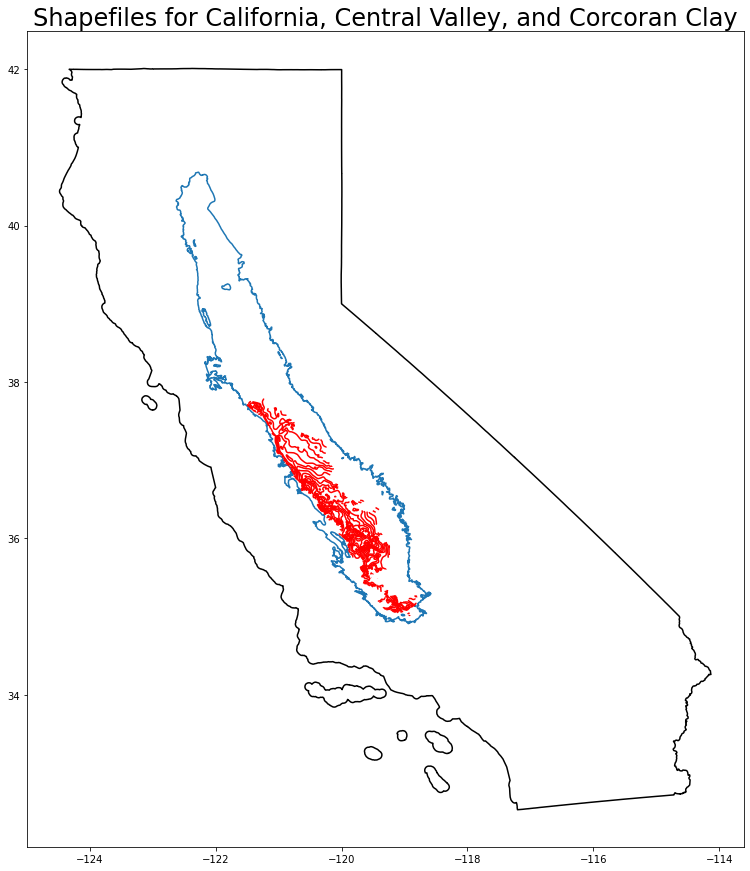

In [5]:
fig, ax = plt.subplots(figsize=(15,15))
CA_map.boundary.plot(ax=ax, color='k')
CV_map.boundary.plot(ax=ax)
CC_map.plot(ax=ax, color='r')
ax.set_title('Shapefiles for California, Central Valley, and Corcoran Clay', fontsize=24)

## read in csv files

In [7]:
well_measurements = pd.read_csv('./well_data/measurements.csv')
well_stations = pd.read_csv('./well_data/stations.csv')
well_perforations = pd.read_csv('./well_data/perforations.csv')

In [8]:
well_measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2532521 entries, 0 to 2532520
Data columns (total 14 columns):
 #   Column              Dtype  
---  ------              -----  
 0   SITE_CODE           object 
 1   WLM_ID              int64  
 2   MSMT_DATE           object 
 3   WLM_RPE             float64
 4   WLM_GSE             float64
 5   GWE                 float64
 6   GSE_GWE             float64
 7   WLM_QA_DESC         object 
 8   WLM_DESC            object 
 9   WLM_ACC_DESC        object 
 10  WLM_ORG_NAME        object 
 11  COOP_ORG_NAME       object 
 12  MONITORING_PROGRAM  object 
 13  MSMT_CMT            object 
dtypes: float64(4), int64(1), object(9)
memory usage: 270.5+ MB


In [8]:
well_stations.info()
#well_stations = well_stations.drop('MONITORING_PROGRAM', 1)
#print(well_stations.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45924 entries, 0 to 45923
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   STN_ID              45924 non-null  int64  
 1   SITE_CODE           45924 non-null  object 
 2   SWN                 41453 non-null  object 
 3   WELL_NAME           17847 non-null  object 
 4   LATITUDE            45924 non-null  float64
 5   LONGITUDE           45924 non-null  float64
 6   GSE                 45914 non-null  float64
 7   GSE_METHOD          45924 non-null  object 
 8   GSE_ACC             45924 non-null  object 
 9   BASIN_CODE          42907 non-null  object 
 10  BASIN_NAME          42907 non-null  object 
 11  COUNTY_NAME         45924 non-null  object 
 12  WELL_DEPTH          13465 non-null  float64
 13  WELL_USE            44528 non-null  object 
 14  WELL_TYPE           45924 non-null  object 
 15  WCR_NO              6313 non-null   object 
 16  MONI

In [9]:
well_stations = well_stations.drop('MONITORING_PROGRAM', 1)

/var/folders/6z/fy9gryg51yvcsygp2msy65400000gq/T/ipykernel_1366/2533315258.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  well_stations = well_stations.drop('MONITORING_PROGRAM', 1)


In [66]:
well_stations.info()
print(well_stations["WELL_USE"].unique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45919 entries, 0 to 45923
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   STN_ID       45919 non-null  int64   
 1   SITE_CODE    45919 non-null  object  
 2   SWN          41452 non-null  object  
 3   WELL_NAME    17842 non-null  object  
 4   LATITUDE     45919 non-null  float64 
 5   LONGITUDE    45919 non-null  float64 
 6   GSE          45909 non-null  float64 
 7   GSE_METHOD   45919 non-null  object  
 8   GSE_ACC      45919 non-null  object  
 9   BASIN_CODE   42902 non-null  object  
 10  BASIN_NAME   42902 non-null  object  
 11  COUNTY_NAME  45919 non-null  object  
 12  WELL_DEPTH   13461 non-null  float64 
 13  WELL_USE     44523 non-null  object  
 14  WELL_TYPE    45919 non-null  object  
 15  WCR_NO       6313 non-null   object  
 16  geometry     45919 non-null  geometry
dtypes: float64(4), geometry(1), int64(1), object(11)
memory usage: 7.3+ M

In [11]:
well_perforations.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13606 entries, 0 to 13605
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   SITE_CODE    13606 non-null  object 
 1   TOP_PRF_INT  13606 non-null  float64
 2   BOT_PRF_INT  13606 non-null  float64
dtypes: float64(2), object(1)
memory usage: 319.0+ KB


In [12]:
well_stations = well_stations.drop_duplicates(subset=['SITE_CODE'])

In [13]:
added_column_list = list(well_stations.columns)
print(added_column_list)
added_column_list.extend(['TOP_PRF_INT_0', 'BOT_PRF_INT_0',
                        'TOP_PRF_INT_1', 'BOT_PRF_INT_1',
                        'TOP_PRF_INT_2', 'BOT_PRF_INT_2',
                        'TOP_PRF_INT_3', 'BOT_PRF_INT_3',
                        'TOP_PRF_INT_4', 'BOT_PRF_INT_4',
                        'TOP_PRF_INT_5', 'BOT_PRF_INT_5',
                        'TOP_PRF_INT_6', 'BOT_PRF_INT_6',
                        'TOP_PRF_INT_7', 'BOT_PRF_INT_7',
                        'TOP_PRF_INT_8', 'BOT_PRF_INT_8',
                        'TOP_PRF_INT_9', 'BOT_PRF_INT_9'])
print(added_column_list)

['STN_ID', 'SITE_CODE', 'SWN', 'WELL_NAME', 'LATITUDE', 'LONGITUDE', 'GSE', 'GSE_METHOD', 'GSE_ACC', 'BASIN_CODE', 'BASIN_NAME', 'COUNTY_NAME', 'WELL_DEPTH', 'WELL_USE', 'WELL_TYPE', 'WCR_NO']
['STN_ID', 'SITE_CODE', 'SWN', 'WELL_NAME', 'LATITUDE', 'LONGITUDE', 'GSE', 'GSE_METHOD', 'GSE_ACC', 'BASIN_CODE', 'BASIN_NAME', 'COUNTY_NAME', 'WELL_DEPTH', 'WELL_USE', 'WELL_TYPE', 'WCR_NO', 'TOP_PRF_INT_0', 'BOT_PRF_INT_0', 'TOP_PRF_INT_1', 'BOT_PRF_INT_1', 'TOP_PRF_INT_2', 'BOT_PRF_INT_2', 'TOP_PRF_INT_3', 'BOT_PRF_INT_3', 'TOP_PRF_INT_4', 'BOT_PRF_INT_4', 'TOP_PRF_INT_5', 'BOT_PRF_INT_5', 'TOP_PRF_INT_6', 'BOT_PRF_INT_6', 'TOP_PRF_INT_7', 'BOT_PRF_INT_7', 'TOP_PRF_INT_8', 'BOT_PRF_INT_8', 'TOP_PRF_INT_9', 'BOT_PRF_INT_9']


In [14]:
well_stations_perforations = well_stations.reindex(columns = added_column_list)

In [15]:
## not the most pythonic way of doing this...

for index, row in well_perforations.iterrows():
    station_index = well_stations_perforations.index[
        well_stations_perforations['SITE_CODE'] == row['SITE_CODE']].tolist()[0]
    if np.isnan(well_stations_perforations.at[station_index,'TOP_PRF_INT_0']):
        print(row["TOP_PRF_INT"])
        well_stations_perforations.at[station_index, 'TOP_PRF_INT_0'] = row["TOP_PRF_INT"]
        print("well station perforation")
        print(well_stations_perforations.at[station_index, 'TOP_PRF_INT_0'])
        well_stations_perforations.at[station_index, 'BOT_PRF_INT_0'] = row["BOT_PRF_INT"]
        
    elif np.isnan(well_stations_perforations.at[station_index, 'TOP_PRF_INT_1']):
        well_stations_perforations.at[station_index, 'TOP_PRF_INT_1'] = row["TOP_PRF_INT"]
        well_stations_perforations.at[station_index, 'BOT_PRF_INT_1'] = row["BOT_PRF_INT"]
        
    elif np.isnan(well_stations_perforations.at[station_index, 'TOP_PRF_INT_2']):
        well_stations_perforations.at[station_index, 'TOP_PRF_INT_2'] = row["TOP_PRF_INT"]
        well_stations_perforations.at[station_index, 'BOT_PRF_INT_2'] = row["BOT_PRF_INT"]
        
    elif np.isnan(well_stations_perforations.at[station_index, 'TOP_PRF_INT_3']):
        well_stations_perforations.at[station_index, 'TOP_PRF_INT_3'] = row["TOP_PRF_INT"]
        well_stations_perforations.at[station_index, 'BOT_PRF_INT_3'] = row["BOT_PRF_INT"]
        
    elif np.isnan(well_stations_perforations.at[station_index, 'TOP_PRF_INT_4']):
        well_stations_perforations.at[station_index, 'TOP_PRF_INT_4'] = row["TOP_PRF_INT"]
        well_stations_perforations.at[station_index, 'BOT_PRF_INT_4'] = row["BOT_PRF_INT"]
        
    elif np.isnan(well_stations_perforations.at[station_index, 'TOP_PRF_INT_5']):
        well_stations_perforations.at[station_index, 'TOP_PRF_INT_5'] = row["TOP_PRF_INT"]
        well_stations_perforations.at[station_index, 'BOT_PRF_INT_5'] = row["BOT_PRF_INT"]
        
    elif np.isnan(well_stations_perforations.at[station_index, 'TOP_PRF_INT_6']):
        well_stations_perforations.at[station_index, 'TOP_PRF_INT_6'] = row["TOP_PRF_INT"]
        well_stations_perforations.at[station_index, 'BOT_PRF_INT_6'] = row["BOT_PRF_INT"]

    elif np.isnan(well_stations_perforations.at[station_index, 'TOP_PRF_INT_7']):
        well_stations_perforations.at[station_index, 'TOP_PRF_INT_7'] = row["TOP_PRF_INT"]
        well_stations_perforations.at[station_index, 'BOT_PRF_INT_7'] = row["BOT_PRF_INT"]

    elif np.isnan(well_stations_perforations.at[station_index, 'TOP_PRF_INT_8']):
        well_stations_perforations.at[station_index, 'TOP_PRF_INT_8'] = row["TOP_PRF_INT"]
        well_stations_perforations.at[station_index, 'BOT_PRF_INT_8'] = row["BOT_PRF_INT"]
        
    else:
        well_stations_perforations.at[station_index, 'TOP_PRF_INT_9'] = row["TOP_PRF_INT"]
        well_stations_perforations.at[station_index, 'BOT_PRF_INT_9'] = row["BOT_PRF_INT"]

260.0
well station perforation
260.0
45.0
well station perforation
45.0
20.0
well station perforation
20.0
140.0
well station perforation
140.0
30.0
well station perforation
30.0
14.5
well station perforation
14.5
15.0
well station perforation
15.0
70.0
well station perforation
70.0
80.0
well station perforation
80.0
5.0
well station perforation
5.0
6.0
well station perforation
6.0
30.0
well station perforation
30.0
30.0
well station perforation
30.0
18.0
well station perforation
18.0
30.0
well station perforation
30.0
70.0
well station perforation
70.0
30.0
well station perforation
30.0
111.0
well station perforation
111.0
50.0
well station perforation
50.0
336.0
well station perforation
336.0
400.0
well station perforation
400.0
267.0
well station perforation
267.0
180.0
well station perforation
180.0
175.0
well station perforation
175.0
40.0
well station perforation
40.0
185.0
well station perforation
185.0
45.0
well station perforation
45.0
240.0
well station perforation
240.0
120.

126.0
well station perforation
126.0
492.0
well station perforation
492.0
886.0
well station perforation
886.0
221.0
well station perforation
221.0
190.0
well station perforation
190.0
48.0
well station perforation
48.0
48.0
well station perforation
48.0
1582.0
well station perforation
1582.0
172.0
well station perforation
172.0
810.0
well station perforation
810.0
422.0
well station perforation
422.0
250.0
well station perforation
250.0
270.0
well station perforation
270.0
300.0
well station perforation
300.0
90.0
well station perforation
90.0
20.0
well station perforation
20.0
20.0
well station perforation
20.0
260.0
well station perforation
260.0
296.0
well station perforation
296.0
364.0
well station perforation
364.0
150.0
well station perforation
150.0
420.0
well station perforation
420.0
230.0
well station perforation
230.0
505.0
well station perforation
505.0
90.0
well station perforation
90.0
1460.0
well station perforation
1460.0
920.0
well station perforation
920.0
450.0
wel

200.0
well station perforation
200.0
370.0
well station perforation
370.0
288.0
well station perforation
288.0
283.0
well station perforation
283.0
1390.0
well station perforation
1390.0
180.0
well station perforation
180.0
330.0
well station perforation
330.0
128.0
well station perforation
128.0
2105.0
well station perforation
2105.0
776.0
well station perforation
776.0
260.0
well station perforation
260.0
404.0
well station perforation
404.0
700.0
well station perforation
700.0
700.0
well station perforation
700.0
70.0
well station perforation
70.0
700.0
well station perforation
700.0
506.0
well station perforation
506.0
460.0
well station perforation
460.0
180.0
well station perforation
180.0
529.0
well station perforation
529.0
1419.0
well station perforation
1419.0
152.0
well station perforation
152.0
91.0
well station perforation
91.0
40.0
well station perforation
40.0
140.0
well station perforation
140.0
160.0
well station perforation
160.0
350.0
well station perforation
350.0
5

380.0
well station perforation
380.0
290.0
well station perforation
290.0
197.0
well station perforation
197.0
705.0
well station perforation
705.0
70.0
well station perforation
70.0
1063.0
well station perforation
1063.0
400.0
well station perforation
400.0
25.0
well station perforation
25.0
121.0
well station perforation
121.0
185.0
well station perforation
185.0
110.0
well station perforation
110.0
135.0
well station perforation
135.0
202.15
well station perforation
202.15
120.0
well station perforation
120.0
145.9
well station perforation
145.9
161.3
well station perforation
161.3
215.0
well station perforation
215.0
305.33
well station perforation
305.33
145.9
well station perforation
145.9
190.15
well station perforation
190.15
262.95
well station perforation
262.95
62.0
well station perforation
62.0
195.0
well station perforation
195.0
295.0
well station perforation
295.0
200.0
well station perforation
200.0
210.0
well station perforation
210.0
20.0
well station perforation
20.0

186.0
well station perforation
186.0
432.0
well station perforation
432.0
593.0
well station perforation
593.0
524.0
well station perforation
524.0
432.0
well station perforation
432.0
470.0
well station perforation
470.0
720.0
well station perforation
720.0
255.0
well station perforation
255.0
180.0
well station perforation
180.0
127.0
well station perforation
127.0
450.0
well station perforation
450.0
80.0
well station perforation
80.0
300.0
well station perforation
300.0
277.0
well station perforation
277.0
1295.0
well station perforation
1295.0
995.0
well station perforation
995.0
305.0
well station perforation
305.0
115.0
well station perforation
115.0
386.0
well station perforation
386.0
120.0
well station perforation
120.0
280.0
well station perforation
280.0
463.0
well station perforation
463.0
830.0
well station perforation
830.0
500.0
well station perforation
500.0
260.0
well station perforation
260.0
720.0
well station perforation
720.0
85.0
well station perforation
85.0
190

298.0
well station perforation
298.0
208.0
well station perforation
208.0
130.0
well station perforation
130.0
180.0
well station perforation
180.0
180.0
well station perforation
180.0
150.0
well station perforation
150.0
50.0
well station perforation
50.0
452.0
well station perforation
452.0
440.0
well station perforation
440.0
100.0
well station perforation
100.0
125.0
well station perforation
125.0
550.0
well station perforation
550.0
100.0
well station perforation
100.0
65.0
well station perforation
65.0
65.0
well station perforation
65.0
80.0
well station perforation
80.0
80.0
well station perforation
80.0
600.0
well station perforation
600.0
270.0
well station perforation
270.0
212.0
well station perforation
212.0
790.0
well station perforation
790.0
575.0
well station perforation
575.0
140.0
well station perforation
140.0
100.0
well station perforation
100.0
460.0
well station perforation
460.0
120.0
well station perforation
120.0
641.0
well station perforation
641.0
443.0
well 

100.0
well station perforation
100.0
63.0
well station perforation
63.0
460.0
well station perforation
460.0
25.0
well station perforation
25.0
60.0
well station perforation
60.0
150.0
well station perforation
150.0
752.0
well station perforation
752.0
635.0
well station perforation
635.0
1080.0
well station perforation
1080.0
928.0
well station perforation
928.0
67.0
well station perforation
67.0
57.0
well station perforation
57.0
635.0
well station perforation
635.0
180.0
well station perforation
180.0
24.0
well station perforation
24.0
878.0
well station perforation
878.0
90.0
well station perforation
90.0
115.0
well station perforation
115.0
5.0
well station perforation
5.0
75.0
well station perforation
75.0
40.0
well station perforation
40.0
407.0
well station perforation
407.0
880.0
well station perforation
880.0
872.0
well station perforation
872.0
40.0
well station perforation
40.0
106.0
well station perforation
106.0
180.0
well station perforation
180.0
144.0
well station perf

260.0
well station perforation
260.0
29.0
well station perforation
29.0
60.0
well station perforation
60.0
5.0
well station perforation
5.0
136.0
well station perforation
136.0
55.0
well station perforation
55.0
200.0
well station perforation
200.0
90.0
well station perforation
90.0
81.0
well station perforation
81.0
72.0
well station perforation
72.0
180.0
well station perforation
180.0
140.0
well station perforation
140.0
26.0
well station perforation
26.0
60.0
well station perforation
60.0
100.0
well station perforation
100.0
530.0
well station perforation
530.0
360.0
well station perforation
360.0
240.0
well station perforation
240.0
120.0
well station perforation
120.0
30.0
well station perforation
30.0
25.0
well station perforation
25.0
250.0
well station perforation
250.0
24.0
well station perforation
24.0
280.0
well station perforation
280.0
18.0
well station perforation
18.0
300.0
well station perforation
300.0
200.0
well station perforation
200.0
18.0
well station perforation

180.0
well station perforation
180.0
167.0
well station perforation
167.0
27.0
well station perforation
27.0
470.0
well station perforation
470.0
360.0
well station perforation
360.0
240.0
well station perforation
240.0
74.0
well station perforation
74.0
240.0
well station perforation
240.0
1070.0
well station perforation
1070.0
1010.0
well station perforation
1010.0
957.0
well station perforation
957.0
830.0
well station perforation
830.0
675.0
well station perforation
675.0
600.0
well station perforation
600.0
480.0
well station perforation
480.0
490.0
well station perforation
490.0
207.0
well station perforation
207.0
180.0
well station perforation
180.0
65.0
well station perforation
65.0
220.0
well station perforation
220.0
4.0
well station perforation
4.0
66.0
well station perforation
66.0
4.0
well station perforation
4.0
1045.0
well station perforation
1045.0
940.0
well station perforation
940.0
770.0
well station perforation
770.0
594.0
well station perforation
594.0
434.0
well 

220.0
well station perforation
220.0
450.0
well station perforation
450.0
360.0
well station perforation
360.0
170.0
well station perforation
170.0
365.0
well station perforation
365.0
20.0
well station perforation
20.0
8.0
well station perforation
8.0
200.0
well station perforation
200.0
279.0
well station perforation
279.0
320.0
well station perforation
320.0
180.0
well station perforation
180.0
80.0
well station perforation
80.0
30.0
well station perforation
30.0
270.0
well station perforation
270.0
320.0
well station perforation
320.0
260.0
well station perforation
260.0
180.0
well station perforation
180.0
160.0
well station perforation
160.0
280.0
well station perforation
280.0
210.0
well station perforation
210.0
330.0
well station perforation
330.0
215.0
well station perforation
215.0
351.0
well station perforation
351.0
210.0
well station perforation
210.0
133.0
well station perforation
133.0
130.0
well station perforation
130.0
226.0
well station perforation
226.0
180.0
well 

55.0
well station perforation
55.0
220.0
well station perforation
220.0
50.0
well station perforation
50.0
290.0
well station perforation
290.0
90.0
well station perforation
90.0
320.0
well station perforation
320.0
70.0
well station perforation
70.0
100.0
well station perforation
100.0
175.0
well station perforation
175.0
150.0
well station perforation
150.0
30.0
well station perforation
30.0
60.0
well station perforation
60.0
280.0
well station perforation
280.0
650.0
well station perforation
650.0
200.0
well station perforation
200.0
550.0
well station perforation
550.0
432.0
well station perforation
432.0
25.0
well station perforation
25.0
34.0
well station perforation
34.0
160.0
well station perforation
160.0
8.0
well station perforation
8.0
170.0
well station perforation
170.0
100.0
well station perforation
100.0
80.0
well station perforation
80.0
120.0
well station perforation
120.0
500.0
well station perforation
500.0
670.0
well station perforation
670.0
590.0
well station perf

265.0
well station perforation
265.0
110.0
well station perforation
110.0
26.7
well station perforation
26.7
605.0
well station perforation
605.0
8.0
well station perforation
8.0
135.0
well station perforation
135.0
13.0
well station perforation
13.0
136.0
well station perforation
136.0
132.0
well station perforation
132.0
150.0
well station perforation
150.0
149.0
well station perforation
149.0
125.0
well station perforation
125.0
142.0
well station perforation
142.0
80.0
well station perforation
80.0
143.0
well station perforation
143.0
190.0
well station perforation
190.0
60.0
well station perforation
60.0
125.0
well station perforation
125.0
220.0
well station perforation
220.0
130.0
well station perforation
130.0
177.0
well station perforation
177.0
140.0
well station perforation
140.0
175.0
well station perforation
175.0
135.0
well station perforation
135.0
228.0
well station perforation
228.0
68.2
well station perforation
68.2
143.0
well station perforation
143.0
1100.0
well sta

630.0
well station perforation
630.0
480.0
well station perforation
480.0
780.0
well station perforation
780.0
510.0
well station perforation
510.0
355.0
well station perforation
355.0
480.0
well station perforation
480.0
180.0
well station perforation
180.0
100.0
well station perforation
100.0
285.0
well station perforation
285.0
515.0
well station perforation
515.0
645.0
well station perforation
645.0
100.0
well station perforation
100.0
600.0
well station perforation
600.0
355.0
well station perforation
355.0
190.0
well station perforation
190.0
270.0
well station perforation
270.0
150.0
well station perforation
150.0
320.0
well station perforation
320.0
520.0
well station perforation
520.0
65.0
well station perforation
65.0
300.0
well station perforation
300.0
665.0
well station perforation
665.0
150.0
well station perforation
150.0
330.0
well station perforation
330.0
520.0
well station perforation
520.0
80.0
well station perforation
80.0
400.0
well station perforation
400.0
150.0

370.0
well station perforation
370.0
105.0
well station perforation
105.0
615.0
well station perforation
615.0
1040.0
well station perforation
1040.0
1500.0
well station perforation
1500.0
1750.0
well station perforation
1750.0
905.0
well station perforation
905.0
850.0
well station perforation
850.0
260.0
well station perforation
260.0
550.0
well station perforation
550.0
400.0
well station perforation
400.0
195.0
well station perforation
195.0
1850.0
well station perforation
1850.0
340.0
well station perforation
340.0
341.0
well station perforation
341.0
190.0
well station perforation
190.0
232.0
well station perforation
232.0
200.0
well station perforation
200.0
180.0
well station perforation
180.0
500.0
well station perforation
500.0
400.0
well station perforation
400.0
560.0
well station perforation
560.0
44.0
well station perforation
44.0
505.0
well station perforation
505.0
445.0
well station perforation
445.0
250.0
well station perforation
250.0
452.0
well station perforation
4

996.0
well station perforation
996.0
504.0
well station perforation
504.0
1130.0
well station perforation
1130.0
121.0
well station perforation
121.0
250.0
well station perforation
250.0
250.0
well station perforation
250.0
1960.0
well station perforation
1960.0
60.0
well station perforation
60.0
798.0
well station perforation
798.0
429.0
well station perforation
429.0
300.0
well station perforation
300.0
500.0
well station perforation
500.0
500.0
well station perforation
500.0
44.0
well station perforation
44.0
470.0
well station perforation
470.0
500.0
well station perforation
500.0
300.0
well station perforation
300.0
194.0
well station perforation
194.0
468.0
well station perforation
468.0
262.0
well station perforation
262.0
11.0
well station perforation
11.0
11.0
well station perforation
11.0
660.0
well station perforation
660.0
390.0
well station perforation
390.0
480.0
well station perforation
480.0
26.0
well station perforation
26.0
450.0
well station perforation
450.0
110.0
w

400.0
well station perforation
400.0
563.0
well station perforation
563.0
530.0
well station perforation
530.0
492.0
well station perforation
492.0
520.0
well station perforation
520.0
1156.0
well station perforation
1156.0
40.0
well station perforation
40.0
495.0
well station perforation
495.0
610.0
well station perforation
610.0
590.0
well station perforation
590.0
744.0
well station perforation
744.0
750.0
well station perforation
750.0
470.0
well station perforation
470.0
620.0
well station perforation
620.0
800.0
well station perforation
800.0
706.0
well station perforation
706.0
628.0
well station perforation
628.0
650.0
well station perforation
650.0
720.0
well station perforation
720.0
322.0
well station perforation
322.0
735.0
well station perforation
735.0
790.0
well station perforation
790.0
560.0
well station perforation
560.0
568.0
well station perforation
568.0
286.0
well station perforation
286.0
144.0
well station perforation
144.0
300.0
well station perforation
300.0
5

80.0
well station perforation
80.0
330.0
well station perforation
330.0
755.0
well station perforation
755.0
770.0
well station perforation
770.0
640.0
well station perforation
640.0
591.0
well station perforation
591.0
260.0
well station perforation
260.0
4.0
well station perforation
4.0
850.0
well station perforation
850.0
1013.0
well station perforation
1013.0
949.0
well station perforation
949.0
368.0
well station perforation
368.0
845.0
well station perforation
845.0
608.0
well station perforation
608.0
760.0
well station perforation
760.0
800.0
well station perforation
800.0
95.0
well station perforation
95.0
954.0
well station perforation
954.0
800.0
well station perforation
800.0
745.0
well station perforation
745.0
300.0
well station perforation
300.0
320.0
well station perforation
320.0
716.0
well station perforation
716.0
1004.0
well station perforation
1004.0
945.0
well station perforation
945.0
601.0
well station perforation
601.0
600.0
well station perforation
600.0
953.0

430.0
well station perforation
430.0
490.0
well station perforation
490.0
610.0
well station perforation
610.0
400.0
well station perforation
400.0
400.0
well station perforation
400.0
380.0
well station perforation
380.0
600.0
well station perforation
600.0
1360.0
well station perforation
1360.0
200.0
well station perforation
200.0
200.0
well station perforation
200.0
1360.0
well station perforation
1360.0
92.0
well station perforation
92.0
685.0
well station perforation
685.0
60.0
well station perforation
60.0
198.0
well station perforation
198.0
858.0
well station perforation
858.0
200.0
well station perforation
200.0
150.0
well station perforation
150.0
1300.0
well station perforation
1300.0
860.0
well station perforation
860.0
288.0
well station perforation
288.0
198.0
well station perforation
198.0
400.0
well station perforation
400.0
4.0
well station perforation
4.0
400.0
well station perforation
400.0
4.0
well station perforation
4.0
640.0
well station perforation
640.0
400.0
w

2700.0
well station perforation
2700.0
396.0
well station perforation
396.0
700.0
well station perforation
700.0
920.0
well station perforation
920.0
180.0
well station perforation
180.0
98.0
well station perforation
98.0
602.0
well station perforation
602.0
770.0
well station perforation
770.0
318.0
well station perforation
318.0
860.0
well station perforation
860.0
640.0
well station perforation
640.0
400.0
well station perforation
400.0
1019.0
well station perforation
1019.0
1650.0
well station perforation
1650.0
1063.0
well station perforation
1063.0
890.0
well station perforation
890.0
1040.0
well station perforation
1040.0
840.0
well station perforation
840.0
621.0
well station perforation
621.0
900.0
well station perforation
900.0
222.0
well station perforation
222.0
603.0
well station perforation
603.0
714.0
well station perforation
714.0
447.0
well station perforation
447.0
300.0
well station perforation
300.0
240.0
well station perforation
240.0
630.0
well station perforation

702.0
well station perforation
702.0
478.0
well station perforation
478.0
150.0
well station perforation
150.0
674.0
well station perforation
674.0
478.0
well station perforation
478.0
320.0
well station perforation
320.0
300.0
well station perforation
300.0
603.0
well station perforation
603.0
50.0
well station perforation
50.0
1335.0
well station perforation
1335.0
5.0
well station perforation
5.0
60.0
well station perforation
60.0
43.0
well station perforation
43.0
240.0
well station perforation
240.0
750.0
well station perforation
750.0
320.0
well station perforation
320.0
667.0
well station perforation
667.0
682.0
well station perforation
682.0
515.0
well station perforation
515.0
330.0
well station perforation
330.0
701.0
well station perforation
701.0
640.0
well station perforation
640.0
655.0
well station perforation
655.0
605.0
well station perforation
605.0
837.0
well station perforation
837.0
268.0
well station perforation
268.0
300.0
well station perforation
300.0
660.0
wel

714.0
well station perforation
714.0
918.0
well station perforation
918.0
850.0
well station perforation
850.0
930.0
well station perforation
930.0
43.0
well station perforation
43.0
179.0
well station perforation
179.0
30.0
well station perforation
30.0
1220.0
well station perforation
1220.0
740.0
well station perforation
740.0
210.0
well station perforation
210.0
355.0
well station perforation
355.0
610.0
well station perforation
610.0
246.0
well station perforation
246.0
290.0
well station perforation
290.0
820.0
well station perforation
820.0
400.0
well station perforation
400.0
49.0
well station perforation
49.0
270.0
well station perforation
270.0
280.0
well station perforation
280.0
363.0
well station perforation
363.0
219.0
well station perforation
219.0
360.0
well station perforation
360.0
810.0
well station perforation
810.0
490.0
well station perforation
490.0
810.0
well station perforation
810.0
300.0
well station perforation
300.0
157.0
well station perforation
157.0
430.0

570.0
well station perforation
570.0
240.0
well station perforation
240.0
722.0
well station perforation
722.0
464.0
well station perforation
464.0
70.0
well station perforation
70.0
380.0
well station perforation
380.0
740.0
well station perforation
740.0
768.0
well station perforation
768.0
475.0
well station perforation
475.0
1820.0
well station perforation
1820.0
1410.0
well station perforation
1410.0
1040.0
well station perforation
1040.0
930.0
well station perforation
930.0
214.0
well station perforation
214.0
326.0
well station perforation
326.0
460.0
well station perforation
460.0
15.0
well station perforation
15.0
800.0
well station perforation
800.0
857.0
well station perforation
857.0
770.0
well station perforation
770.0
560.0
well station perforation
560.0
632.0
well station perforation
632.0
819.0
well station perforation
819.0
783.0
well station perforation
783.0
712.0
well station perforation
712.0
600.0
well station perforation
600.0
380.0
well station perforation
380.0

200.0
well station perforation
200.0
120.0
well station perforation
120.0
135.0
well station perforation
135.0
425.0
well station perforation
425.0
630.0
well station perforation
630.0
168.0
well station perforation
168.0
90.0
well station perforation
90.0
305.0
well station perforation
305.0
443.0
well station perforation
443.0
220.0
well station perforation
220.0
68.0
well station perforation
68.0
160.0
well station perforation
160.0
50.0
well station perforation
50.0
300.0
well station perforation
300.0
230.0
well station perforation
230.0
60.0
well station perforation
60.0
153.0
well station perforation
153.0
173.0
well station perforation
173.0
200.0
well station perforation
200.0
200.0
well station perforation
200.0
288.0
well station perforation
288.0
153.0
well station perforation
153.0
210.0
well station perforation
210.0
80.0
well station perforation
80.0
130.0
well station perforation
130.0
60.0
well station perforation
60.0
120.0
well station perforation
120.0
228.0
well st

310.0
well station perforation
310.0
210.0
well station perforation
210.0
318.0
well station perforation
318.0
320.0
well station perforation
320.0
125.0
well station perforation
125.0
110.0
well station perforation
110.0
330.0
well station perforation
330.0
630.0
well station perforation
630.0
470.0
well station perforation
470.0
400.0
well station perforation
400.0
150.0
well station perforation
150.0
105.0
well station perforation
105.0
670.0
well station perforation
670.0
193.0
well station perforation
193.0
670.0
well station perforation
670.0
530.0
well station perforation
530.0
110.0
well station perforation
110.0
250.0
well station perforation
250.0
310.0
well station perforation
310.0
90.0
well station perforation
90.0
149.0
well station perforation
149.0
270.0
well station perforation
270.0
130.0
well station perforation
130.0
205.0
well station perforation
205.0
255.0
well station perforation
255.0
470.0
well station perforation
470.0
270.0
well station perforation
270.0
270

150.0
well station perforation
150.0
290.0
well station perforation
290.0
278.0
well station perforation
278.0
80.0
well station perforation
80.0
20.0
well station perforation
20.0
115.0
well station perforation
115.0
348.0
well station perforation
348.0
20.0
well station perforation
20.0
90.0
well station perforation
90.0
60.0
well station perforation
60.0
185.0
well station perforation
185.0
395.0
well station perforation
395.0
360.0
well station perforation
360.0
360.0
well station perforation
360.0
120.0
well station perforation
120.0
215.0
well station perforation
215.0
120.0
well station perforation
120.0
158.0
well station perforation
158.0
40.0
well station perforation
40.0
30.0
well station perforation
30.0
10.0
well station perforation
10.0
10.0
well station perforation
10.0
100.0
well station perforation
100.0
50.0
well station perforation
50.0
400.0
well station perforation
400.0
96.0
well station perforation
96.0
532.0
well station perforation
532.0
60.0
well station perfo

70.0
well station perforation
70.0
120.0
well station perforation
120.0
165.0
well station perforation
165.0
125.0
well station perforation
125.0
83.0
well station perforation
83.0
8.0
well station perforation
8.0
18.0
well station perforation
18.0
116.0
well station perforation
116.0
98.0
well station perforation
98.0
15.0
well station perforation
15.0
25.0
well station perforation
25.0
120.0
well station perforation
120.0
44.0
well station perforation
44.0
148.0
well station perforation
148.0
398.0
well station perforation
398.0
60.0
well station perforation
60.0
250.0
well station perforation
250.0
165.0
well station perforation
165.0
80.0
well station perforation
80.0
510.0
well station perforation
510.0
390.0
well station perforation
390.0
280.0
well station perforation
280.0
160.0
well station perforation
160.0
630.0
well station perforation
630.0
181.0
well station perforation
181.0
46.0
well station perforation
46.0
230.0
well station perforation
230.0
115.0
well station perfor

0.5
well station perforation
0.5
160.0
well station perforation
160.0
315.0
well station perforation
315.0
0.5
well station perforation
0.5
0.5
well station perforation
0.5
60.0
well station perforation
60.0
248.0
well station perforation
248.0
0.5
well station perforation
0.5
120.0
well station perforation
120.0
0.5
well station perforation
0.5
170.0
well station perforation
170.0
0.5
well station perforation
0.5
258.0
well station perforation
258.0
5.0
well station perforation
5.0
146.0
well station perforation
146.0
208.0
well station perforation
208.0
0.5
well station perforation
0.5
0.5
well station perforation
0.5
0.5
well station perforation
0.5
0.5
well station perforation
0.5
176.0
well station perforation
176.0
130.0
well station perforation
130.0
0.5
well station perforation
0.5
0.5
well station perforation
0.5
0.5
well station perforation
0.5
156.0
well station perforation
156.0
209.0
well station perforation
209.0
0.5
well station perforation
0.5
300.0
well station perfora

274.0
well station perforation
274.0
320.0
well station perforation
320.0
197.0
well station perforation
197.0
50.0
well station perforation
50.0
486.5
well station perforation
486.5
220.0
well station perforation
220.0
86.0
well station perforation
86.0
42.0
well station perforation
42.0
67.0
well station perforation
67.0
60.0
well station perforation
60.0
60.0
well station perforation
60.0
30.0
well station perforation
30.0
415.0
well station perforation
415.0
120.0
well station perforation
120.0
330.0
well station perforation
330.0
240.0
well station perforation
240.0
370.0
well station perforation
370.0
60.0
well station perforation
60.0
270.0
well station perforation
270.0
200.0
well station perforation
200.0
0.5
well station perforation
0.5
29.0
well station perforation
29.0
290.0
well station perforation
290.0
68.0
well station perforation
68.0
73.0
well station perforation
73.0
75.0
well station perforation
75.0
180.0
well station perforation
180.0
80.0
well station perforation

229.0
well station perforation
229.0
110.0
well station perforation
110.0
230.0
well station perforation
230.0
350.0
well station perforation
350.0
580.0
well station perforation
580.0
162.0
well station perforation
162.0
40.0
well station perforation
40.0
160.0
well station perforation
160.0
520.0
well station perforation
520.0
520.0
well station perforation
520.0
480.0
well station perforation
480.0
220.0
well station perforation
220.0
61.0
well station perforation
61.0
520.0
well station perforation
520.0
16.5
well station perforation
16.5
39.0
well station perforation
39.0
154.0
well station perforation
154.0
71.0
well station perforation
71.0
455.0
well station perforation
455.0
280.0
well station perforation
280.0
260.0
well station perforation
260.0
95.0
well station perforation
95.0
158.0
well station perforation
158.0
195.0
well station perforation
195.0
21.0
well station perforation
21.0
104.0
well station perforation
104.0
116.0
well station perforation
116.0
35.0
well stati

160.0
well station perforation
160.0
200.0
well station perforation
200.0
310.0
well station perforation
310.0
56.0
well station perforation
56.0
65.0
well station perforation
65.0
41.0
well station perforation
41.0
44.0
well station perforation
44.0
40.0
well station perforation
40.0
240.0
well station perforation
240.0
428.0
well station perforation
428.0
618.0
well station perforation
618.0
748.0
well station perforation
748.0
272.0
well station perforation
272.0
52.0
well station perforation
52.0
49.0
well station perforation
49.0
406.0
well station perforation
406.0
576.0
well station perforation
576.0
770.0
well station perforation
770.0
275.0
well station perforation
275.0
315.0
well station perforation
315.0
100.0
well station perforation
100.0
460.0
well station perforation
460.0
144.0
well station perforation
144.0
0.1
well station perforation
0.1
27.0
well station perforation
27.0
175.0
well station perforation
175.0
55.0
well station perforation
55.0
115.0
well station perf

140.0
well station perforation
140.0
0.0
well station perforation
0.0
24.0
well station perforation
24.0
540.0
well station perforation
540.0
450.0
well station perforation
450.0
240.0
well station perforation
240.0
130.0
well station perforation
130.0
120.0
well station perforation
120.0
178.0
well station perforation
178.0
60.0
well station perforation
60.0
169.0
well station perforation
169.0
482.0
well station perforation
482.0
294.0
well station perforation
294.0
194.0
well station perforation
194.0
440.0
well station perforation
440.0
124.0
well station perforation
124.0
53.0
well station perforation
53.0
101.0
well station perforation
101.0
170.0
well station perforation
170.0
230.0
well station perforation
230.0
5.0
well station perforation
5.0
20.0
well station perforation
20.0
215.0
well station perforation
215.0
20.0
well station perforation
20.0
78.0
well station perforation
78.0
5.0
well station perforation
5.0
5.0
well station perforation
5.0
130.0
well station perforatio

25.0
well station perforation
25.0
171.0
well station perforation
171.0
12.13
well station perforation
12.13
46.68
well station perforation
46.68
10.0
well station perforation
10.0
20.0
well station perforation
20.0
200.0
well station perforation
200.0
9.0
well station perforation
9.0
33.0
well station perforation
33.0
10.0
well station perforation
10.0
160.0
well station perforation
160.0
473.0
well station perforation
473.0
65.0
well station perforation
65.0
420.0
well station perforation
420.0
58.0
well station perforation
58.0
330.0
well station perforation
330.0
60.0
well station perforation
60.0
100.0
well station perforation
100.0
64.0
well station perforation
64.0
20.0
well station perforation
20.0
15.0
well station perforation
15.0
33.0
well station perforation
33.0
8.0
well station perforation
8.0
16.22
well station perforation
16.22
45.58
well station perforation
45.58
12.0
well station perforation
12.0
60.0
well station perforation
60.0
30.0
well station perforation
30.0
60

65.0
well station perforation
65.0
1727.0
well station perforation
1727.0
160.0
well station perforation
160.0
95.0
well station perforation
95.0
58.0
well station perforation
58.0
80.0
well station perforation
80.0
25.0
well station perforation
25.0
70.0
well station perforation
70.0
108.0
well station perforation
108.0
133.0
well station perforation
133.0
350.0
well station perforation
350.0
93.0
well station perforation
93.0
122.0
well station perforation
122.0
176.0
well station perforation
176.0
155.0
well station perforation
155.0
173.0
well station perforation
173.0
280.0
well station perforation
280.0
575.0
well station perforation
575.0
200.0
well station perforation
200.0
33.0
well station perforation
33.0
100.0
well station perforation
100.0
80.0
well station perforation
80.0
125.0
well station perforation
125.0
30.0
well station perforation
30.0
660.0
well station perforation
660.0
70.0
well station perforation
70.0
670.0
well station perforation
670.0
60.0
well station per

170.0
well station perforation
170.0
170.0
well station perforation
170.0
55.0
well station perforation
55.0
192.0
well station perforation
192.0
97.0
well station perforation
97.0
320.0
well station perforation
320.0
254.0
well station perforation
254.0
89.0
well station perforation
89.0
222.0
well station perforation
222.0
33.0
well station perforation
33.0
430.0
well station perforation
430.0
200.0
well station perforation
200.0
229.0
well station perforation
229.0
50.0
well station perforation
50.0
110.0
well station perforation
110.0
116.0
well station perforation
116.0
180.0
well station perforation
180.0
20.0
well station perforation
20.0
219.0
well station perforation
219.0
194.0
well station perforation
194.0
170.0
well station perforation
170.0
260.0
well station perforation
260.0
230.0
well station perforation
230.0
350.0
well station perforation
350.0
230.0
well station perforation
230.0
233.0
well station perforation
233.0
280.0
well station perforation
280.0
146.0
well st

179.0
well station perforation
179.0
87.1
well station perforation
87.1
104.0
well station perforation
104.0
130.0
well station perforation
130.0
23.7
well station perforation
23.7
44.7
well station perforation
44.7
19.7
well station perforation
19.7
44.8
well station perforation
44.8
90.5
well station perforation
90.5
252.0
well station perforation
252.0
104.0
well station perforation
104.0
30.0
well station perforation
30.0
95.0
well station perforation
95.0
102.0
well station perforation
102.0
35.0
well station perforation
35.0
26.0
well station perforation
26.0
80.0
well station perforation
80.0
240.0
well station perforation
240.0
26.0
well station perforation
26.0
82.0
well station perforation
82.0
20.0
well station perforation
20.0
160.0
well station perforation
160.0
180.0
well station perforation
180.0
120.0
well station perforation
120.0
149.0
well station perforation
149.0
120.0
well station perforation
120.0
535.0
well station perforation
535.0
725.0
well station perforatio

132.0
well station perforation
132.0
100.0
well station perforation
100.0
270.0
well station perforation
270.0
160.0
well station perforation
160.0
160.0
well station perforation
160.0
110.0
well station perforation
110.0
152.0
well station perforation
152.0
320.0
well station perforation
320.0
20.0
well station perforation
20.0
142.0
well station perforation
142.0
110.0
well station perforation
110.0
120.0
well station perforation
120.0
210.0
well station perforation
210.0
570.0
well station perforation
570.0
655.0
well station perforation
655.0
240.0
well station perforation
240.0
28.0
well station perforation
28.0
152.0
well station perforation
152.0
120.0
well station perforation
120.0
54.0
well station perforation
54.0
254.0
well station perforation
254.0
548.0
well station perforation
548.0
525.0
well station perforation
525.0
230.0
well station perforation
230.0
360.0
well station perforation
360.0
80.0
well station perforation
80.0
52.0
well station perforation
52.0
28.0
well s

65.0
well station perforation
65.0
210.0
well station perforation
210.0
220.0
well station perforation
220.0
136.0
well station perforation
136.0
140.0
well station perforation
140.0
15.0
well station perforation
15.0
75.0
well station perforation
75.0
28.0
well station perforation
28.0
226.0
well station perforation
226.0
72.0
well station perforation
72.0
358.0
well station perforation
358.0
180.0
well station perforation
180.0
100.0
well station perforation
100.0
90.0
well station perforation
90.0
175.0
well station perforation
175.0
18.0
well station perforation
18.0
240.0
well station perforation
240.0
37.6
well station perforation
37.6
138.3
well station perforation
138.3
160.0
well station perforation
160.0
240.0
well station perforation
240.0
38.0
well station perforation
38.0
130.0
well station perforation
130.0
58.0
well station perforation
58.0
224.0
well station perforation
224.0
342.0
well station perforation
342.0
45.0
well station perforation
45.0
155.0
well station perf

26.0
well station perforation
26.0
102.0
well station perforation
102.0
14.0
well station perforation
14.0
140.0
well station perforation
140.0
85.0
well station perforation
85.0
9.0
well station perforation
9.0
35.0
well station perforation
35.0
80.0
well station perforation
80.0
10.0
well station perforation
10.0
90.0
well station perforation
90.0
120.0
well station perforation
120.0
308.0
well station perforation
308.0
220.0
well station perforation
220.0
133.0
well station perforation
133.0
176.0
well station perforation
176.0
155.0
well station perforation
155.0
80.0
well station perforation
80.0
254.0
well station perforation
254.0
150.0
well station perforation
150.0
180.0
well station perforation
180.0
100.0
well station perforation
100.0
110.0
well station perforation
110.0
66.0
well station perforation
66.0
40.0
well station perforation
40.0
20.0
well station perforation
20.0
160.0
well station perforation
160.0
135.0
well station perforation
135.0
30.0
well station perforati

0.0
well station perforation
0.0
165.0
well station perforation
165.0
460.0
well station perforation
460.0
200.0
well station perforation
200.0
740.0
well station perforation
740.0
70.0
well station perforation
70.0
850.0
well station perforation
850.0
130.0
well station perforation
130.0
45.0
well station perforation
45.0
70.0
well station perforation
70.0
14.0
well station perforation
14.0
65.0
well station perforation
65.0
130.8
well station perforation
130.8
160.0
well station perforation
160.0
50.0
well station perforation
50.0
94.0
well station perforation
94.0
85.0
well station perforation
85.0
800.0
well station perforation
800.0
130.0
well station perforation
130.0
50.0
well station perforation
50.0
920.0
well station perforation
920.0
80.0
well station perforation
80.0
80.0
well station perforation
80.0
80.0
well station perforation
80.0
435.0
well station perforation
435.0
34.0
well station perforation
34.0
118.0
well station perforation
118.0
73.0
well station perforation
7

120.0
well station perforation
120.0
135.0
well station perforation
135.0
367.0
well station perforation
367.0
80.0
well station perforation
80.0
140.0
well station perforation
140.0
80.0
well station perforation
80.0
135.0
well station perforation
135.0
52.0
well station perforation
52.0
170.0
well station perforation
170.0
143.0
well station perforation
143.0
97.0
well station perforation
97.0
120.0
well station perforation
120.0
160.0
well station perforation
160.0
106.0
well station perforation
106.0
139.0
well station perforation
139.0
25.0
well station perforation
25.0
116.0
well station perforation
116.0
11.0
well station perforation
11.0
158.0
well station perforation
158.0
180.0
well station perforation
180.0
251.0
well station perforation
251.0
37.0
well station perforation
37.0
498.0
well station perforation
498.0
150.0
well station perforation
150.0
99.0
well station perforation
99.0
25.0
well station perforation
25.0
106.0
well station perforation
106.0
32.0
well station p

56.0
well station perforation
56.0
68.0
well station perforation
68.0
63.0
well station perforation
63.0
50.0
well station perforation
50.0
160.0
well station perforation
160.0
60.0
well station perforation
60.0
1.0
well station perforation
1.0
62.0
well station perforation
62.0
76.0
well station perforation
76.0
36.0
well station perforation
36.0
50.0
well station perforation
50.0
72.0
well station perforation
72.0
36.0
well station perforation
36.0
20.0
well station perforation
20.0
60.0
well station perforation
60.0
52.0
well station perforation
52.0
1.0
well station perforation
1.0
463.0
well station perforation
463.0
98.0
well station perforation
98.0
60.0
well station perforation
60.0
120.0
well station perforation
120.0
140.0
well station perforation
140.0
120.0
well station perforation
120.0
55.0
well station perforation
55.0
36.0
well station perforation
36.0
16.0
well station perforation
16.0
0.0
well station perforation
0.0
48.0
well station perforation
48.0
50.0
well statio

In [16]:
well_msp = well_measurements.merge(well_stations_perforations, how='left', left_on='SITE_CODE', right_on='SITE_CODE')

In [55]:
well_msp.head()

,SITE_CODE,WLM_ID,MSMT_DATE,WLM_RPE,WLM_GSE,GWE,GSE_GWE,WLM_QA_DESC,WLM_DESC,WLM_ACC_DESC,...,TOP_PRF_INT_5,BOT_PRF_INT_5,TOP_PRF_INT_6,BOT_PRF_INT_6,TOP_PRF_INT_7,BOT_PRF_INT_7,TOP_PRF_INT_8,BOT_PRF_INT_8,TOP_PRF_INT_9,BOT_PRF_INT_9
0,320000N1140000W001,3016758,2021-08-26 20:00:00,545.92,545.92,133.92,412.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,320000N1140000W001,3016757,2021-07-29 19:00:00,545.92,545.92,135.92,410.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,320000N1140000W001,3016756,2021-06-24 18:00:00,545.92,545.92,134.92,411.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,320000N1140000W001,3016755,2021-05-27 17:00:00,545.92,545.92,134.92,411.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,320000N1140000W001,3016754,2021-04-29 16:00:00,545.92,545.92,136.92,409.0,NaN,Electric sounder measurement,Water level accuracy to nearest hundredth of a...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
#site_data = {}
#for index, row in well_sites.iterrows():
#    site_data[row["SITE_CODE"]] = {'LATITUDE': row["LATITUDE"], 'LONGITUDE': row["LONGITUDE"]}

In [19]:
#well_lat_lon = pd.DataFrame(list(well_measurements["SITE_CODE"].map(site_lat_lon)))
#well_measurements_with_lat_lon = pd.concat([well_measurements, well_lat_lon], axis=1)
#print(well_measurements_with_lat_lon.info())
#print(len(np.unique(well_measurements_with_lat_lon['SITE_CODE'].to_numpy())))

In [20]:
#print(well_sites["WCR_NO"].nunique())

In [56]:
monitoring_wells = well_stations_perforations[(well_stations_perforations["WELL_USE"] == 'Observation') & 
                              (~well_stations_perforations["WCR_NO"].isna()) & 
                              (well_stations_perforations["WCR_NO"] != 'YES') &
                              (~well_stations_perforations["TOP_PRF_INT_0"].isna())]

In [67]:
residential_wells = well_stations_perforations[(well_stations_perforations["WELL_USE"] == 'Residential') & 
                              (~well_stations_perforations["WCR_NO"].isna()) & 
                              (well_stations_perforations["WCR_NO"] != 'YES') &
                              (~well_stations_perforations["TOP_PRF_INT_0"].isna())]

In [73]:
agricultural_wells = well_stations_perforations[(well_stations_perforations["WELL_USE"] == 'Irrigation') & 
                              (~well_stations_perforations["WCR_NO"].isna()) & 
                              (well_stations_perforations["WCR_NO"] != 'YES') &
                              (~well_stations_perforations["TOP_PRF_INT_0"].isna())]

In [74]:
agricultural_wells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2321 entries, 2393 to 45916
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STN_ID         2321 non-null   int64  
 1   SITE_CODE      2321 non-null   object 
 2   SWN            1888 non-null   object 
 3   WELL_NAME      2187 non-null   object 
 4   LATITUDE       2321 non-null   float64
 5   LONGITUDE      2321 non-null   float64
 6   GSE            2321 non-null   float64
 7   GSE_METHOD     2321 non-null   object 
 8   GSE_ACC        2321 non-null   object 
 9   BASIN_CODE     2308 non-null   object 
 10  BASIN_NAME     2308 non-null   object 
 11  COUNTY_NAME    2321 non-null   object 
 12  WELL_DEPTH     2282 non-null   float64
 13  WELL_USE       2321 non-null   object 
 14  WELL_TYPE      2321 non-null   object 
 15  WCR_NO         2321 non-null   object 
 16  TOP_PRF_INT_0  2321 non-null   float64
 17  BOT_PRF_INT_0  2321 non-null   float64
 18  TOP_

In [58]:
monitoring_wells.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1734 entries, 809 to 45822
Data columns (total 36 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   STN_ID         1734 non-null   int64  
 1   SITE_CODE      1734 non-null   object 
 2   SWN            1203 non-null   object 
 3   WELL_NAME      1730 non-null   object 
 4   LATITUDE       1734 non-null   float64
 5   LONGITUDE      1734 non-null   float64
 6   GSE            1734 non-null   float64
 7   GSE_METHOD     1734 non-null   object 
 8   GSE_ACC        1734 non-null   object 
 9   BASIN_CODE     1720 non-null   object 
 10  BASIN_NAME     1720 non-null   object 
 11  COUNTY_NAME    1734 non-null   object 
 12  WELL_DEPTH     1715 non-null   float64
 13  WELL_USE       1734 non-null   object 
 14  WELL_TYPE      1734 non-null   object 
 15  WCR_NO         1734 non-null   object 
 16  TOP_PRF_INT_0  1734 non-null   float64
 17  BOT_PRF_INT_0  1734 non-null   float64
 18  TOP_P

In [59]:
site_points = [Point(xy) for xy in zip(well_stations["LONGITUDE"], well_stations["LATITUDE"])]

In [75]:
monitoring_site_points = [Point(xy) for xy in zip(monitoring_wells["LONGITUDE"], monitoring_wells["LATITUDE"])]
residential_site_points = [Point(xy) for xy in zip(residential_wells["LONGITUDE"], residential_wells["LATITUDE"])]
agricultural_site_points = [Point(xy) for xy in zip(agricultural_wells["LONGITUDE"], agricultural_wells["LATITUDE"])]

In [76]:
crs='epsg:4326'
geo_sites = gpd.GeoDataFrame(well_stations, crs=crs, geometry=site_points)
monitoring_sites = gpd.GeoDataFrame(monitoring_wells, crs=crs, geometry=monitoring_site_points)
residential_sites = gpd.GeoDataFrame(residential_wells, crs=crs, geometry=residential_site_points)
agricultural_sites = gpd.GeoDataFrame(agricultural_wells, crs=crs, geometry=agricultural_site_points)

In [77]:
cv_monitoring_sites = monitoring_sites.sjoin(CV_map)
cc_monitoring_sites = monitoring_sites.sjoin(CC_map)

cv_residential_sites = residential_sites.sjoin(CV_map)
cc_residential_sites = residential_sites.sjoin(CC_map)

cv_agricultural_sites = agricultural_sites.sjoin(CV_map)
cc_agricultural_sites = agricultural_sites.sjoin(CC_map)

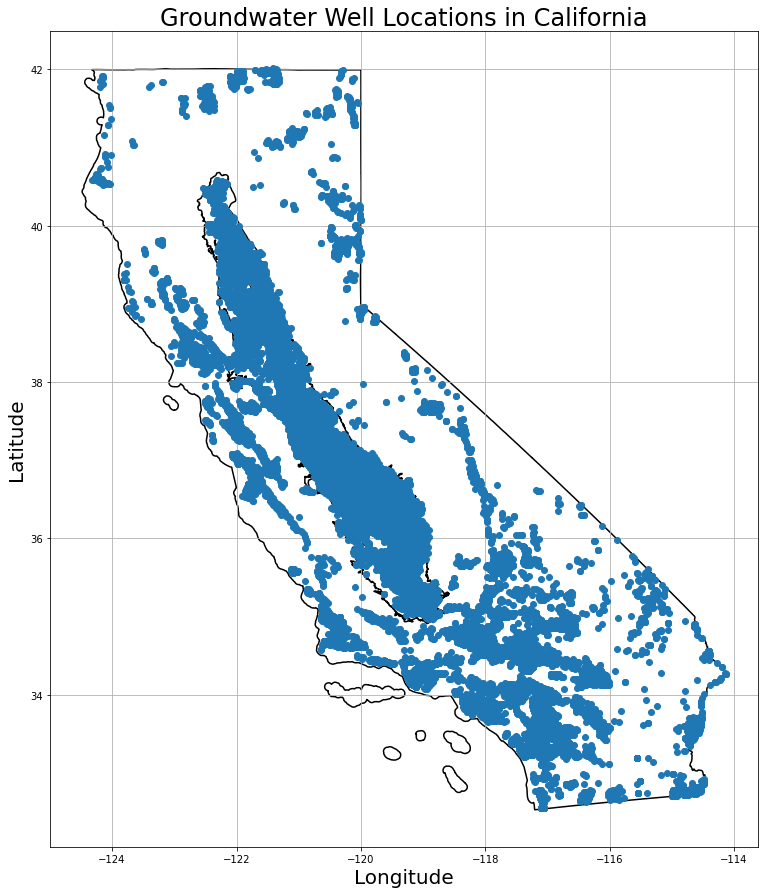

In [63]:
#plt.figure(figsize=(8,6))
#plt.plot(well_sites["LONGITUDE"], well_sites["LATITUDE"], '.')
#plt.grid()
fig, ax = plt.subplots(figsize=(15,15))
CA_map.boundary.plot(ax=ax, color='k', zorder=1)
CV_map.boundary.plot(ax=ax, color='k', zorder=1)
geo_sites.plot(ax=ax, zorder=2)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)
ax.set_title('Groundwater Well Locations in California', fontsize=24)
ax.grid(zorder=0)

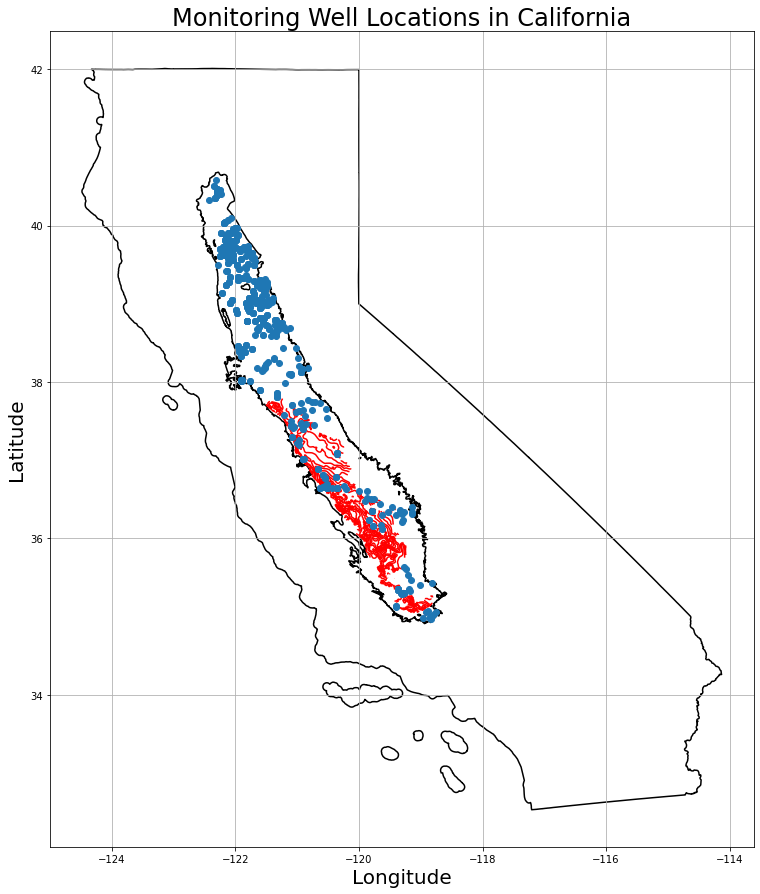

In [64]:
#plt.figure(figsize=(8,6))
#plt.plot(well_sites["LONGITUDE"], well_sites["LATITUDE"], '.')
#plt.grid()
fig, ax = plt.subplots(figsize=(15,15))
CA_map.boundary.plot(ax=ax, color='k', zorder=1)
CV_map.boundary.plot(ax=ax, color='k', zorder=1)
CC_map.plot(ax=ax, color='r')
cv_monitoring_sites.plot(ax=ax, zorder=2)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)
ax.set_title('Monitoring Well Locations in California', fontsize=24)
ax.grid(zorder=0)

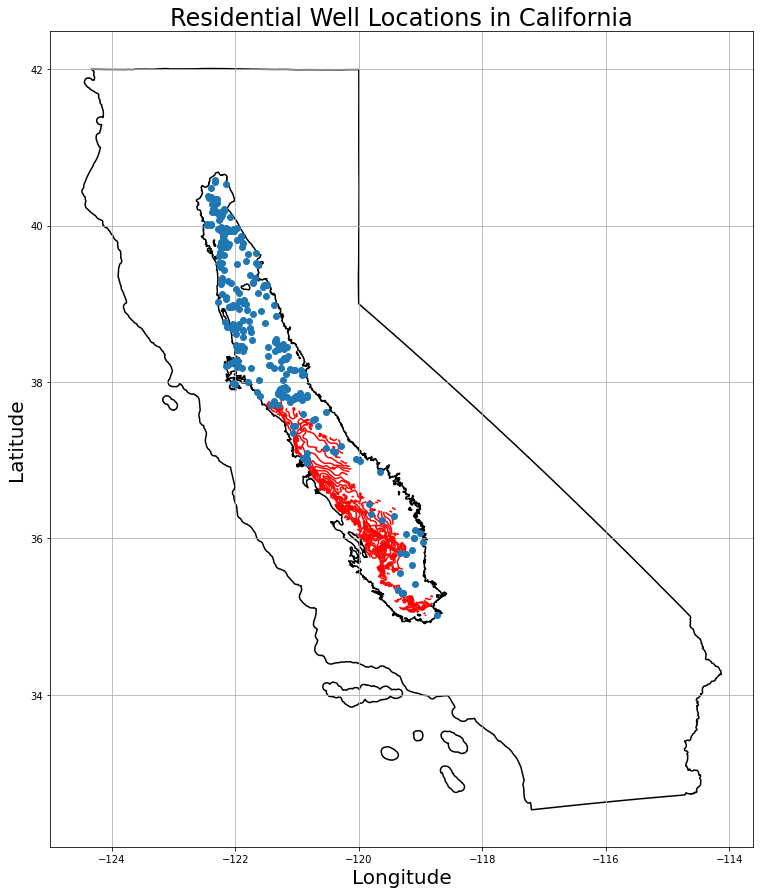

In [72]:
#plt.figure(figsize=(8,6))
#plt.plot(well_sites["LONGITUDE"], well_sites["LATITUDE"], '.')
#plt.grid()
fig, ax = plt.subplots(figsize=(15,15))
CA_map.boundary.plot(ax=ax, color='k', zorder=1)
CV_map.boundary.plot(ax=ax, color='k', zorder=1)
CC_map.plot(ax=ax, color='r')
cv_residential_sites.plot(ax=ax, zorder=2)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)
ax.set_title('Residential Well Locations in California', fontsize=24)
ax.grid(zorder=0)

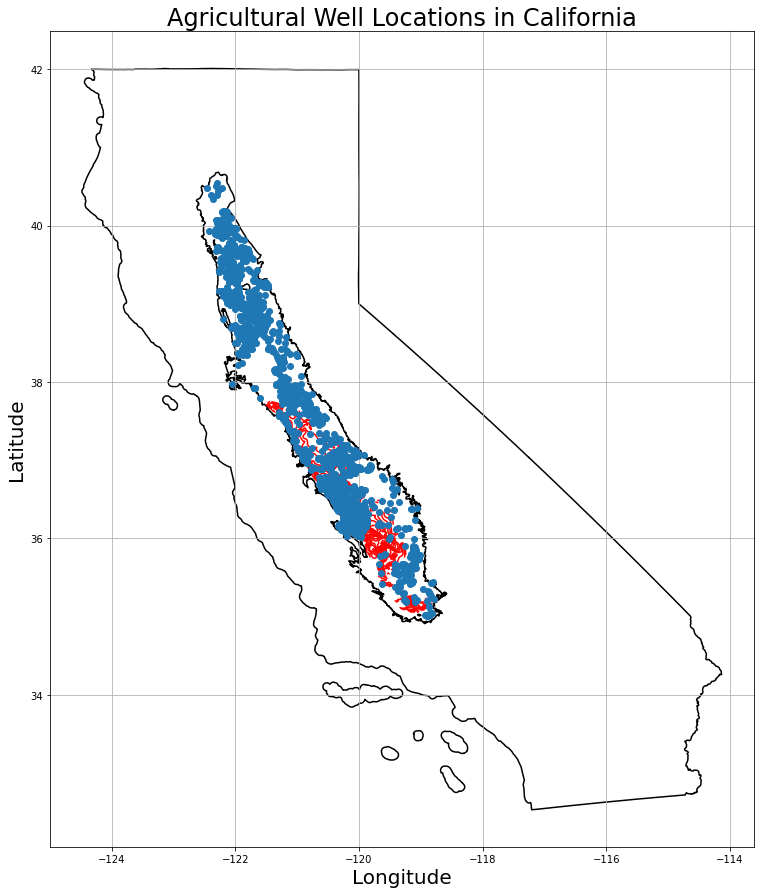

In [79]:
#plt.figure(figsize=(8,6))
#plt.plot(well_sites["LONGITUDE"], well_sites["LATITUDE"], '.')
#plt.grid()
fig, ax = plt.subplots(figsize=(15,15))
CA_map.boundary.plot(ax=ax, color='k', zorder=1)
CV_map.boundary.plot(ax=ax, color='k', zorder=1)
CC_map.plot(ax=ax, color='r')
cv_agricultural_sites.plot(ax=ax, zorder=2)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)
ax.set_title('Agricultural Well Locations in California', fontsize=24)
ax.grid(zorder=0)

In [30]:
well_sites = pd.read_csv('allyears_shallowconfined.csv')
well_sites.info()
print(len(np.unique(well_sites['SITE_CODE'].to_numpy())))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61074 entries, 0 to 61073
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   SITE_CODE                         61074 non-null  object 
 1   WLM_ID                            61074 non-null  int64  
 2   MSMT_DATE                         61074 non-null  object 
 3   WLM_RPE                           61074 non-null  float64
 4   WLM_GSE                           61074 non-null  float64
 5   GWE                               53105 non-null  float64
 6   GSE_GWE                           53105 non-null  float64
 7   WLM_QA_DESC                       12305 non-null  object 
 8   WLM_DESC                          53100 non-null  object 
 9   WLM_ACC_DESC                      53102 non-null  object 
 10  WLM_ORG_NAME                      61074 non-null  object 
 11  COOP_ORG_NAME                     61074 non-null  object 
 12  MONI

In [31]:
shallow_sites = well_sites[well_sites['type']=='shallow']

In [32]:
confined_sites = well_sites[well_sites['type']=='confined']

In [33]:
shallow_points = [Point(xy) for xy in zip(shallow_sites["long"], well_sites["lat"])]
crs='epsg:4326'
shallow_sites = gpd.GeoDataFrame(shallow_sites, crs=crs, geometry=shallow_points)

In [34]:
confined_points = [Point(xy) for xy in zip(confined_sites["long"], confined_sites["lat"])]
confined_sites = gpd.GeoDataFrame(confined_sites, crs=crs, geometry=confined_points)

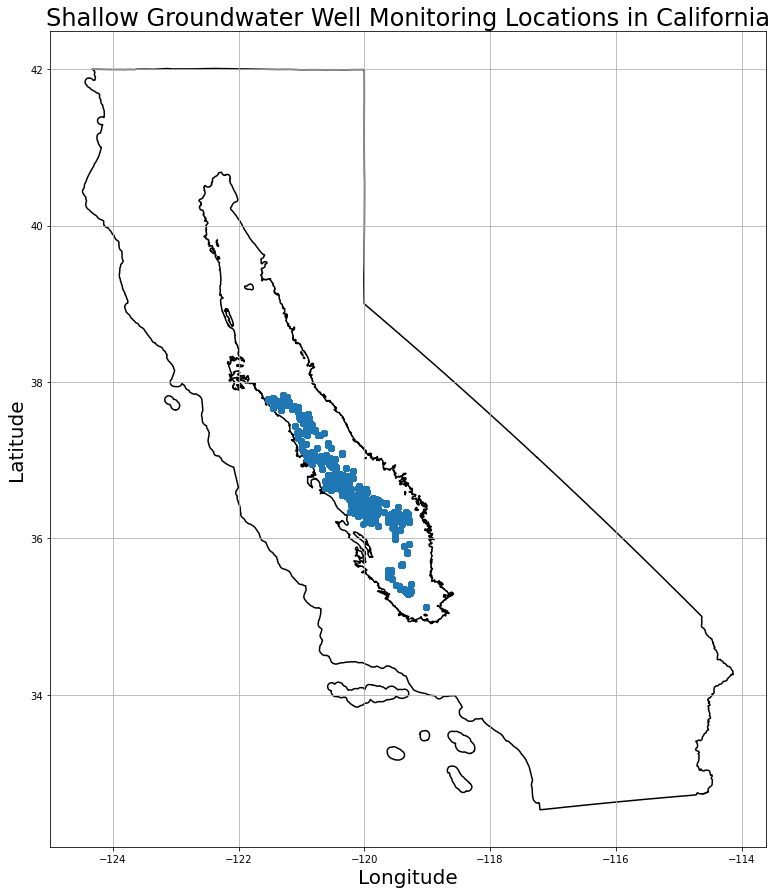

In [35]:
fig, ax = plt.subplots(figsize=(15,15))
CA_map.boundary.plot(ax=ax, color='k', zorder=1)
CV_map.boundary.plot(ax=ax, color='k', zorder=1)
shallow_sites.plot(ax=ax, zorder=2)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)
ax.set_title('Shallow Groundwater Well Monitoring Locations in California', fontsize=24)
ax.grid(zorder=0)

SITE_CODE	text	Site Code	
Location based 18 character alphanumeric code assigned to each well

WLM_ID	numeric	Water Level Measurement Unique Id	
Unique database identifier for water level measurement

MSMT_DATE	timestamp	Water Level Measurement Date (PST)	
Date/Time (in PST) the groundwater level measurement was collected.

WLM_RPE	numeric	RPE for a specific water level measurement record	
Reference Point Elevation used to collect the groundwater level measurement in feet referenced to the North American Vertical Datum of 1988 (NAVD88)

WLM_GSE	numeric	GSE for a specific water level measurement record	
Ground Surface Elevation at the well site in feet referenced to the North American Vertical Datum of 1988 (NAVD88)

GWE	numeric	Groundwater Elevation	
Groundwater elevation in feet above mean sea level, using NAVD88.

GSE_GWE	numeric	Ground Surface Elevation to Groundwater Elevation	
Depth to groundwater elevation in feet below ground surface.

WLM_QA_DESC	text	Water Level Measurement Quality Description	
Quality assurance description for groundwater level measurement (questionable or no measurement code)

WLM_DESC	text	Water Level Measurement Method Description	
Description of water level measurement method.

WLM_ACC_DESC	text	Water Level Measurement Accuracy Description	
Description for accuracy of water level (elevation) measurement.

WLM_ORG_NAME	text	Submitting Organization	
Organization which submitted the water level measurement.

COOP_ORG_NAME	text	Collecting Organization	
Organization that collected the water level measurement. (May be the Submitting Organization or a third-party cooperating organization.)

MONITORING_PROGRAM	text	DWR Monitoring Program	
DWR Monitoring Program this well is primarily monitored under, e.g. SGMA (Sustainable Groundwater Management Act), CASGEM (California Statewide Groundwater Elevation Monitoring program), or Voluntary.

MSMT_CMT	text	Water Level Measurement Comments	
Comments regarding this measurement.

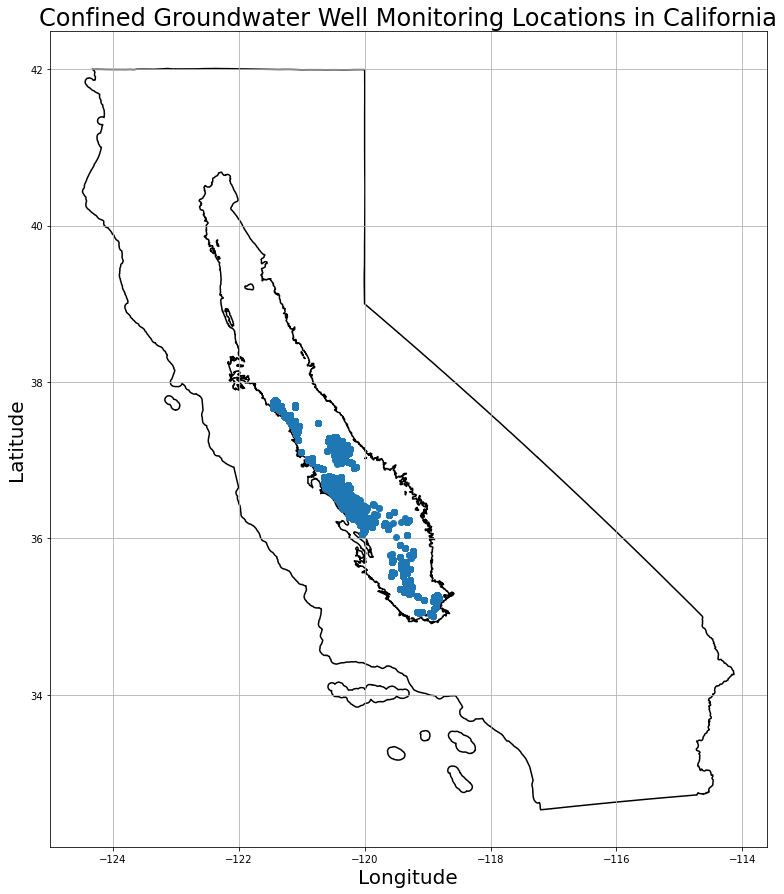

In [36]:
fig, ax = plt.subplots(figsize=(15,15))
CA_map.boundary.plot(ax=ax, color='k', zorder=1)
CV_map.boundary.plot(ax=ax, color='k', zorder=1)
confined_sites.plot(ax=ax, zorder=2)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)
ax.set_title('Confined Groundwater Well Monitoring Locations in California', fontsize=24)
ax.grid(zorder=0)

In [37]:
print(len(np.unique(well_sites[well_sites['type']=='shallow']['SITE_CODE'])))
print(len(np.unique(well_sites[well_sites['type']=='confined']['SITE_CODE'])))

551
742


## continuous data

In [38]:
c_well_measurements = pd.read_csv('./continuousgroundwaterdaily.csv')
c_well_stations = pd.read_csv('./gwl-stations.csv')
c_well_codes = pd.read_csv('./groundwater_quality_codes.csv')

In [39]:
c_well_measurements.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2269333 entries, 0 to 2269332
Data columns (total 12 columns):
 #   Column      Dtype  
---  ------      -----  
 0   STATION     object 
 1   MSMT_DATE   object 
 2   WLM_RPE     float64
 3   WLM_RPE_QC  int64  
 4   WLM_GSE     float64
 5   WLM_GSE_QC  int64  
 6   RPE_WSE     float64
 7   RPE_WSE_QC  int64  
 8   GSE_WSE     float64
 9   GSE_WSE_QC  int64  
 10  WSE         float64
 11  WSE_QC      int64  
dtypes: float64(5), int64(5), object(2)
memory usage: 207.8+ MB


In [40]:
c_well_codes

,QUALITY_CODE,DESCRIPTION
0,1,Good data
1,2,Good quality edited data
2,10,Good Measurement
3,15,Provisional measurement
4,20,"Dry, no flow"
5,26,Data imported from historic records.
6,30,Irregular Time Rate Data - weekly/monthly read.
7,35,Estimated data imported from historic records.
8,40,Fair Measurement
9,50,Unknown Measurement Quality


In [80]:
c_well_stations["WELL_USE"].unique()

array(['Observation', nan, 'Irrigation', 'Other', 'Residential',
       'Stockwatering', 'Industrial'], dtype=object)

In [42]:
c_monitoring_wells = c_well_stations[(c_well_stations["WELL_USE"] == 'Observation') & 
                              (~c_well_stations["WCR_NO"].isna()) & 
                              (c_well_stations["WCR_NO"] != 'YES')]

In [43]:
c_monitoring_site_points = [Point(xy) for xy in zip(c_monitoring_wells["LONGITUDE"], c_monitoring_wells["LATITUDE"])]

In [44]:
c_monitoring_sites = gpd.GeoDataFrame(c_monitoring_wells, crs=crs, geometry=c_monitoring_site_points)

In [45]:
cv_c_monitoring_sites = c_monitoring_sites.sjoin(CV_map)
cv_c_monitoring_sites.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 316 entries, 12 to 468
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   STATION      316 non-null    object  
 1   SITE_CODE    316 non-null    object  
 2   STNAME       316 non-null    object  
 3   WELL_NAME    316 non-null    object  
 4   LATITUDE     316 non-null    float64 
 5   LONGITUDE    316 non-null    float64 
 6   LLDATUM      316 non-null    object  
 7   POSACC       316 non-null    object  
 8   ELEV         316 non-null    float64 
 9   ELEVDATUM    10 non-null     object  
 10  ELEVACC      316 non-null    object  
 11  COUNTY_NAME  316 non-null    object  
 12  BASIN_CODE   316 non-null    object  
 13  BASIN_NAME   316 non-null    object  
 14  WELL_DEPTH   309 non-null    float64 
 15  WELL_USE     316 non-null    object  
 16  WELL_TYPE    316 non-null    object  
 17  WCR_NO       316 non-null    object  
 18  WDL          316 non-

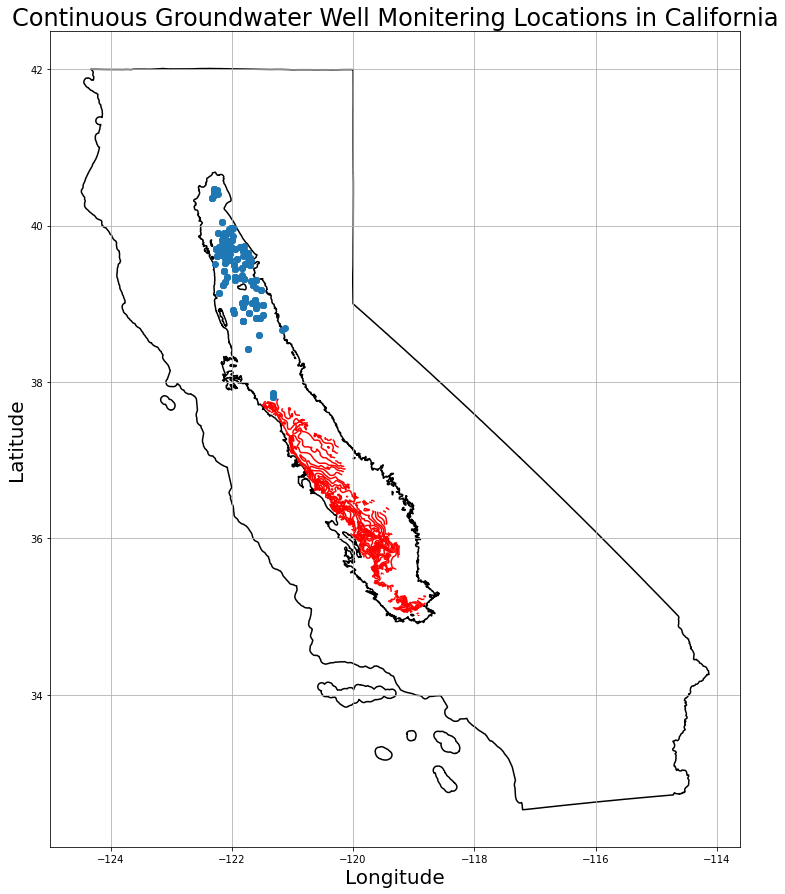

In [46]:
#plt.figure(figsize=(8,6))
#plt.plot(well_sites["LONGITUDE"], well_sites["LATITUDE"], '.')
#plt.grid()
fig, ax = plt.subplots(figsize=(15,15))
CA_map.boundary.plot(ax=ax, color='k', zorder=1)
CV_map.boundary.plot(ax=ax, color='k', zorder=1)
CC_map.plot(ax=ax, color='r')
cv_c_monitoring_sites.plot(ax=ax, zorder=2)
ax.set_xlabel('Longitude', fontsize=20)
ax.set_ylabel('Latitude', fontsize=20)
ax.set_title('Continuous Groundwater Well Monitering Locations in California', fontsize=24)
ax.grid(zorder=0)

In [47]:
c_monitoring_sites.sort_values("WELL_NAME").head()

,STATION,SITE_CODE,STNAME,WELL_NAME,LATITUDE,LONGITUDE,LLDATUM,POSACC,ELEV,ELEVDATUM,...,COUNTY_NAME,BASIN_CODE,BASIN_NAME,WELL_DEPTH,WELL_USE,WELL_TYPE,WCR_NO,WDL,COMMENT,geometry
460,30N04W10H004M,404705N1222952W001,SHA_10H004M screen interval 35 to 55 bgs,10H004M shallow,40.470520,-122.295136,WGS84,"GPS, 10m",418.80,NaN,...,Shasta,5-006.03,Anderson,62.0,Observation,Single Well,0962986,https://wdl.water.ca.gov/StationDetails.aspx?S...,NaN,POINT (-122.29514 40.47052)
134,12N04E26J002M,388593N1214885W001,American Basin Well 2 deep screen 670-690 ft bgs,AB-2 Deep,38.859400,-121.488500,NAD83,"GPS, 10m",51.62,NaN,...,Sutter,5-021.64,North American,700.0,Observation,Part of a nested/multi-completion well,51-1072,https://wdl.water.ca.gov/StationDetails.aspx?S...,NaN,POINT (-121.48850 38.85940)
135,12N04E26J003M,388593N1214885W002,"American Basin Well 2 mid screen 380-390,480-4...",AB-2 Middle,38.859400,-121.488500,NAD83,"GPS, 10m",51.62,NaN,...,Sutter,5-021.64,North American,500.0,Observation,Part of a nested/multi-completion well,51-1073,https://wdl.water.ca.gov/StationDetails.aspx?S...,NaN,POINT (-121.48850 38.85940)
136,12N04E26J004M,388593N1214885W003,American Basin Well 2 shallow screen 135-145 f...,AB-2 Shallow,38.859400,-121.488500,NAD83,"GPS, 10m",51.62,NaN,...,Sutter,5-021.64,North American,155.0,Observation,Part of a nested/multi-completion well,51-1074,https://wdl.water.ca.gov/StationDetails.aspx?S...,NaN,POINT (-121.48850 38.85940)
461,30N04W10H005M,404704N1222952W001,SHA_10H005M screen interval 110 to 160 bgs,ACID 10H005M,40.470478,-122.295155,WGS84,"GPS, 10m",418.70,NaN,...,Shasta,5-006.03,Anderson,161.0,Observation,Single Well,0962985,https://wdl.water.ca.gov/StationDetails.aspx?S...,NaN,POINT (-122.29515 40.47048)


In [48]:
monitoring_sites.sort_values("WELL_NAME").head()

,STN_ID,SITE_CODE,SWN,WELL_NAME,LATITUDE,LONGITUDE,GSE,GSE_METHOD,GSE_ACC,BASIN_CODE,...,BOT_PRF_INT_5,TOP_PRF_INT_6,BOT_PRF_INT_6,TOP_PRF_INT_7,BOT_PRF_INT_7,TOP_PRF_INT_8,BOT_PRF_INT_8,TOP_PRF_INT_9,BOT_PRF_INT_9,geometry
5064,50393,337001N1161639W001,05S08E33D001S,"""CWA Well 10""",33.7001,-116.164,-57.100,USGS quad,5 ft.,7-021.01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-116.16400 33.70010)
7813,53531,341934N1190956W001,NaN,01N21W04N02S,34.1934,-119.096,44.686,USGS quad,2.5 ft,4-004.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-119.09600 34.19340)
7662,55632,341645N1190916W001,01N21W16P005S,01N21W16P05S,34.1645,-119.092,25.750,Surveyed,0.1 ft.,4-004.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-119.09200 34.16450)
7663,55633,341645N1190916W002,01N21W16P006S,01N21W16P06S,34.1645,-119.092,25.750,Surveyed,0.1 ft.,4-004.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-119.09200 34.16450)
8486,53503,342864N1189131W002,NaN,02N19W06F01S,34.2864,-118.913,604.000,Digital Elevation Model,10 ft.,4-008,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-118.91300 34.28640)


Talk with Christina (03/17/2022)

- most concerned with the semiconfined aquifer in the north
- wants piezometers to measure pressure to see if well is truly measuring water table
- some wells have multiple screenings/perforations to capture drainage areas rather than intermitent clays (check well logs)
- if there's not enough observation wells, use agricultural or residential wells
- thinks the key is in the well logs (first depth to water measurement vs. water table measurement at the end of drilling. If it's different -> not truly measuring water table)
- DWR has started analyzing them but it's all over the place.